In [1]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('store_unified_summary.csv', encoding='utf-8-sig')

In [22]:
# 1. Ï†úÏô∏Ìï† Ïª¨Îüº Ï†ïÏùò
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm"
]

# 2. Ïó∞ÏÜçÌòï Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (INT, FLOAT/DECIMAL)
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. Ï†úÏô∏ Ïª¨Îüº Ï†úÍ±∞ ÌõÑ Ïû°Ïùå ÎåÄÏÉÅ Ïª¨ÎüºÎßå Ï∂îÏ∂ú
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# 4. Ïû°Ïùå Ï∂îÍ∞Ä Ìï®Ïàò Ï†ïÏùò
def add_noise(series, noise_level=0.01):
    """series Í∞íÏóê ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Î∞ò ÎûúÎç§ Ïû°Ïùå Ï∂îÍ∞Ä"""
    std = series.std()
    noise = np.random.normal(0, noise_level * std, size=series.shape)
    return series + noise

# 5. Ïû°Ïùå Ï∂îÍ∞Ä Ï†ÅÏö©
data_noisy = data.copy()
data_noisy[target_cols] = data_noisy[target_cols].apply(lambda col: add_noise(col, noise_level=0.01))

In [23]:
pd.set_option('display.max_columns', None)
data_noisy.head()

store_id  owner_id business_registration_no  industry_code   open_date  \
0       101      1101             101-74-60399   56112.492220  2024-11-04   
1       101      1101             101-80-14374   56111.760740  2024-11-04   
2       101      1101             101-90-34754   56112.550936  2024-11-04   
3       101      1101             101-04-50959   56111.334664  2024-11-04   
4       101      1101             101-31-21926   56111.652813  2024-11-04   

  summary_year_month  total_sales_amount  weekday_sales_amount  \
0            2024-11        2.914500e+06          1.487105e+06   
1            2024-12        3.021302e+06          1.916500e+06   
2            2025-01        3.604233e+06          2.158519e+06   
3            2025-02        4.068355e+06          2.121266e+06   
4            2025-03        4.555029e+06          2.496296e+06   

   weekend_sales_amount  lunch_sales_ratio  dinner_sales_ratio  \
0          1.157659e+06          31.880613           26.722939   
1          1.394906e+06          24.712312           26.410375   
2          1.447443e+06          20.221484           26.362401   
3          1.786815e+06          26.368072           33.699834   
4          1.918831e+06          22.180210           25.689425   

   transaction_count  weekday_transaction_count  weekend_transaction_count  \
0         162.201206                  93.943729                  87.998900   
1         155.790556                 111.004736                  92.976523   
2         153.807957                 104.882454                  77.668921   
3         216.607746                 103.294141                 100.153360   
4         146.999971                 116.833489                  91.953546   

   mom_growth_rate  yoy_growth_rate  sales_cv  avg_transaction_value  \
0         1.166290              NaN  0.142595           16130.601646   
1        13.782679              NaN  0.164949           16890.162266   
2        12.158115              NaN  0.147917           18603.385884   
3        13.322389              NaN  0.171970           20500.046770   
4        13.543144              NaN  0.178759           22914.130610   

   weekday_avg_transaction_value  weekend_avg_transaction_value  \
0                   15263.230415                   18230.627684   
1                   15865.461510                   18830.712295   
2                   17589.380244                   20928.035457   
3                   19437.623797                   23144.141852   
4                   21485.865545                   25817.368881   

   cash_payment_ratio  card_payment_ratio  revisit_customer_sales_ratio  \
0           15.645055           84.470299                     40.332698   
1           19.269992           80.628609                     50.623325   
2           15.956582           84.319855                     50.871412   
3           18.399419           81.669713                     49.814455   
4           21.921691           78.158082                     53.172686   

   new_customer_ratio         created_dttm         updated_dttm  \
0           53.702950  2025-09-08 00:21:10  2025-09-08 00:21:18   
1           69.517155  2025-09-08 00:21:10  2025-09-08 00:21:18   
2           63.596665  2025-09-08 00:21:10  2025-09-08 00:21:18   
3           60.088186  2025-09-08 00:21:10  2025-09-08 00:21:18   
4           69.528632  2025-09-08 00:21:10  2025-09-08 00:21:18   

     last_updated_dttm  electricity_usage_kwh  electricity_bill_amount  \
0  2025-09-08 00:21:10             866.196843            111754.542561   
1  2025-09-08 00:21:10            1138.830360            128612.810147   
2  2025-09-08 00:21:10            1084.786827            129570.563029   
3  2025-09-08 00:21:10             908.044529            105337.880119   
4  2025-09-08 00:21:10             777.459071             92201.937511   

   gas_usage_m3  water_usage_ton  energy_eff_appliance_ratio  \
0    502.144473         9.262955                   35.600224   
1    693.34842

In [24]:
# ==============================
# Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ==============================
# 1. Ïä§ÏºÄÏùºÎßÅ
# ==============================
# R: X_df <- df[, 11:18]; X_df <- X_df[, -1]
data_noisy2 = data_noisy.drop(data_noisy.columns[[0, 1]], axis=1)

# 1. Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = data_noisy2.select_dtypes(include=["int64", "float64"]).columns

# exclude_cols Ï†úÍ±∞
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# ÌëúÏ§ÄÌôî ÏàòÌñâ
scaler = StandardScaler()
standardized_X = pd.DataFrame(
    scaler.fit_transform(data_noisy[target_cols]),
    columns=target_cols
)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Î∞òÏòÅÌïòÍ≥† Ïã∂ÏúºÎ©¥
data_standardized = data_noisy.copy()
data_standardized[target_cols] = standardized_X

In [25]:
data_standardized

store_id  owner_id business_registration_no  industry_code   open_date  \
0         101      1101             101-74-60399      -0.497384  2024-11-04   
1         101      1101             101-80-14374      -0.514471  2024-11-04   
2         101      1101             101-90-34754      -0.496013  2024-11-04   
3         101      1101             101-04-50959      -0.524423  2024-11-04   
4         101      1101             101-31-21926      -0.516992  2024-11-04   
..        ...       ...                      ...            ...         ...   
970       150      1150             150-77-31039      -0.530734  2020-03-22   
971       150      1150             150-04-15505      -0.537037  2020-03-22   
972       150      1150             150-94-98257      -0.529623  2020-03-22   
973       150      1150             150-71-85465      -0.536234  2020-03-22   
974       150      1150             150-14-97785      -0.530399  2020-03-22   

    summary_year_month  total_sales_amount  weekday_sales_amount  \
0              2024-11           -0.582278             -0.602565   
1              2024-12           -0.578536             -0.578531   
2              2025-01           -0.558111             -0.564984   
3              2025-02           -0.541849             -0.567069   
4              2025-03           -0.524797             -0.546077   
..                 ...                 ...                   ...   
970            2025-04           -0.012031              0.058060   
971            2025-05           -0.004137              0.077365   
972            2025-06           -0.026606              0.064016   
973            2025-07           -0.022720              0.051501   
974            2025-08           -0.022370              0.051607   

     weekend_sales_amount  lunch_sales_ratio  dinner_sales_ratio  \
0               -0.561329           0.408418           -0.186683   
1               -0.539606          -0.515822           -0.217535   
2               -0.534796          -1.094845           -0.222271   
3               -0.503723          -0.302338            0.501978   
4               -0.491635          -0.842297           -0.288697   
..                    ...                ...                 ...   
970             -0.119926          -0.027162            0.021260   
971             -0.140942           0.720550            0.630541   
972             -0.137043          -0.351300            0.176899   
973             -0.137710          -0.245635           -0.292388   
974             -0.140570           0.377068            0.040316   

     transaction_count  weekday_transaction_count  weekend_transaction_count  \
0            -0.631533                  -0.666324                  -0.545066   
1            -0.634794                  -0.651453                  -0.539130   
2            -0.635802                  -0.656789                  -0.557383   
3            -0.603855                  -0.658174                  -0.530573   
4            -0.639266                  -0.646372                  -0.540350   
..                 ...                        ...                        ...   
970          -0.064411                   0.041512                  -0.206994   
971           0.179141                   0.324067                  -0.033921   
972           0.192234                   0.333057                   0.000574   
973          -0.013456                   0.097705                  -0.145389   
974           0.165837                   0.313593                  -0.031109   

     mom_growth_rate  yoy_growth_rate  sales_cv  avg_transaction_value  \
0           0.214559              NaN  0.193143              -0.033438   
1           3.438549              NaN  0.543221               0.075462   
2           3.023408              NaN  0.276489               0.321090   
3           3.320926              NaN  0.653178               0.593019   
4           3.377338              NaN  0.759490               0.939131   
..               

In [27]:
from sklearn.feature_selection import VarianceThreshold
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# ===============================
# 1) Ï†úÏô∏Ìï† Ïª¨Îüº Ï†ïÏùò (id, ÎÇ†Ïßú, boolean)
# ===============================
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm"
]

# ===============================
# 2) Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù ÌõÑ exclude_cols Ï†úÍ±∞
# ===============================
numeric_cols = data_standardized.select_dtypes(include=["int64", "float64"]).columns
validation_cols = [col for col in numeric_cols if col not in exclude_cols]
X_validation = data_standardized[validation_cols]

# ===============================
# 3) NaN / Inf Ï†úÍ±∞
# ===============================
X_validation = X_validation.replace([np.inf, -np.inf], np.nan).dropna()

# ===============================
# 4) Î∂ÑÏÇ∞ Í±∞Ïùò 0 Ïª¨Îüº Ï†úÍ±∞
# ===============================
selector = VarianceThreshold(threshold=1e-5)
X_validation_filtered = pd.DataFrame(
    selector.fit_transform(X_validation),
    columns=X_validation.columns[selector.get_support()]
)

# ===============================
# 5) ÏÉÅÍ¥Ä ÎÜíÏùÄ Ïª¨Îüº Ï†úÍ±∞ (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú)
# ===============================
corr_matrix = X_validation_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.999)]
X_validation_filtered = X_validation_filtered.drop(columns=to_drop)

# ===============================
# 6) Bartlett's Test
# ===============================

print("Data shape after preprocessing:", X_validation_filtered.shape)
chi_square_value, p_value = calculate_bartlett_sphericity(X_validation_filtered)
print("Bartlett‚Äôs test: Chi-square =", chi_square_value, " p-value =", p_value)

# ===============================
# 7) KMO Test
# ===============================
kmo_all, kmo_model = calculate_kmo(X_validation_filtered)
print("KMO Model:", kmo_model)

Data shape after preprocessing: (392, 54)
Bartlett‚Äôs test: Chi-square = 43922.83156481499  p-value = 0.0
KMO Model: 0.8560170193387104


/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [28]:
X_validation_filtered.head()

industry_code  total_sales_amount  weekday_sales_amount  \
0      -0.503279           -0.359979             -0.393256   
1      -0.495506           -0.344509             -0.405067   
2      -0.487376           -0.311250             -0.385408   
3      -0.480579           -0.304397             -0.373372   
4      -0.487351           -0.296467             -0.344429   

   weekend_sales_amount  lunch_sales_ratio  dinner_sales_ratio  \
0             -0.311200           0.543575            0.691526   
1             -0.274837          -0.515605            0.814296   
2             -0.255638          -0.733074            0.217288   
3             -0.231338          -0.514958           -0.015803   
4             -0.224993          -0.818099           -0.325522   

   transaction_count  weekday_transaction_count  weekend_transaction_count  \
0          -0.526584                  -0.578219                  -0.450074   
1          -0.498380                  -0.566462                  -0.443798   
2          -0.478613                  -0.526554                  -0.420775   
3          -0.518179                  -0.533241                  -0.425456   
4          -0.502541                  -0.558971                  -0.430557   

   mom_growth_rate  yoy_growth_rate  sales_cv  avg_transaction_value  \
0         1.115323         1.215128 -0.138568               1.219859   
1         0.987715         1.208846 -0.134603               1.119358   
2         1.158660         1.203420  0.233849               0.888941   
3         0.993623         1.193983  0.161686               1.129623   
4         1.363885         1.193850  0.611220               1.632381   

   cash_payment_ratio  revisit_customer_sales_ratio  new_customer_ratio  \
0            0.288827                     -0.052369            0.774314   
1            0.594217                     -0.296617            0.902854   
2           -0.114385                     -0.838728            1.377237   
3            0.482308                     -0.534946            0.265988   
4           -0.472299                     -1.250480            0.885784   

   electricity_usage_kwh  electricity_bill_amount  gas_usage_m3  \
0               0.314589                 0.471479      1.308778   
1               0.150771                 0.078440      1.418700   
2              -0.720987                -0.713265      0.198130   
3              -0.686011                -0.736414     -0.651961   
4              -0.949227                -0.851089     -0.673283   

   water_usage_ton  energy_eff_appliance_ratio  \
0         0.104881                   -0.548005   
1        -0.707033                    0.600969   
2        -0.132248                   -0.962591   
3         0.068086                   -1.816059   
4        -0.279408                   -0.866095   

   participate_energy_eff_support  participate_high_eff_equip_support  \
0                       -0.585324                            2.151533   
1                       -0.585071                           -0.470745   
2                       -0.570182                            2.161325   
3                       -0.578033                           -0.466984   
4                        1.748241                           -0.450035   

   food_waste_kg_per_day  recycle_waste_kg_per_day  yellow_umbrella_member  \
0               0.137193                 -0.012461               -0.778883   
1              -0.012234                  0.095644               -0.768589   
2              -0.314862                  0.061913               -0.775524   
3              -0.058746                  0.053841               -0.776256   
4               0.140457                 -0.156885                1.295482   

   yellow_umbrella_months  yellow_umbrella_amount  \
0               -0.461103               -0.654172   
1               -0.484518               -0.648693   
2               -0.478023               -0.645866   
3               -0.495462               -0.651749   
4  

/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Eigenvalues: [1.85570204e+01 8.63435966e+00 5.71156473e+00 2.74765249e+00
 2.40729158e+00 1.60813255e+00 1.30534027e+00 1.23641762e+00
 1.05853104e+00 1.03992518e+00 1.00385272e+00 9.50438767e-01
 9.34495442e-01 8.37767974e-01 8.04071418e-01 7.86579444e-01
 7.77342898e-01 7.24974402e-01 6.95676441e-01 6.82829293e-01
 6.65392663e-01 6.47866034e-01 5.99527537e-01 5.55262719e-01
 5.26088447e-01 5.04249658e-01 4.40450344e-01 3.74759025e-01
 3.38792766e-01 3.01033593e-01 2.47470421e-01 2.01782046e-01
 1.77522993e-01 1.64635781e-01 1.56100971e-01 1.55305021e-01
 1.17246125e-01 1.06676489e-01 5.54381900e-02 3.93459390e-02
 3.51530198e-02 2.66580280e-02 1.99236146e-02 1.31528309e-02
 7.30050170e-03 7.03472908e-03 6.28600276e-03 3.15015467e-03
 1.01201299e-03 2.49608019e-04 1.15923309e-04 1.06350952e-04
 1.02760689e-04 9.97839066e-05 9.55002889e-05 9.43178094e-05
 8.64767207e-05 8.53572985e-05 8.19292336e-05]


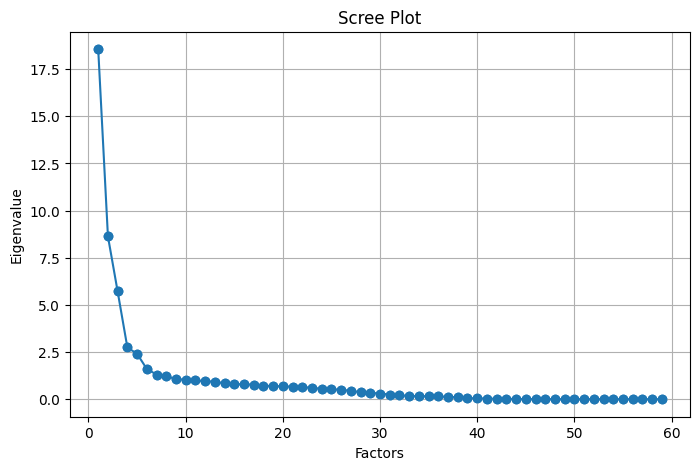

In [29]:

# ==============================
# 3. ÏöîÏù∏ Í∞úÏàò ÌåêÎã®
# ==============================
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# ÏµúÎåÄ ÏöîÏù∏ Í∞úÏàò = Î≥ÄÏàò Í∞úÏàò
fa = FactorAnalyzer(n_factors=standardized_X.shape[1], rotation=None)
fa.fit(standardized_X)

# Í≥†Ïú†Í∞í ÌôïÏù∏
ev, v = fa.get_eigenvalues()
print("Eigenvalues:", ev)

# Scree plot
plt.figure(figsize=(8,5))
plt.scatter(range(1, standardized_X.shape[1]+1), ev)
plt.plot(range(1, standardized_X.shape[1]+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [19]:

# ==============================
# 4. ÏöîÏù∏Î∂ÑÏÑù ÏàòÌñâ (Ïòà: n_factors=5)
# ==============================
fa2 = FactorAnalyzer(n_factors=5, rotation="varimax")
fa2.fit(X_validation_filtered)

# ÏöîÏù∏Ï†ÅÏû¨Îüâ
loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
print("Factor Loadings:\n", loadings2)

# Í≥µÌÜµÏÑ±
communalities2 = pd.DataFrame(fa2.get_communalities(), index=X_validation_filtered.columns, columns=["Communality"])
print(communalities2)

Factor Loadings:
                                            0         1         2         3  \
industry_code                       0.117105  0.006490 -0.966277  0.068739   
total_sales_amount                  0.973413  0.170126  0.048614  0.119577   
weekday_sales_amount                0.962381  0.174886  0.101785  0.088196   
weekend_sales_amount                0.968909  0.159270 -0.041326  0.167303   
lunch_sales_ratio                  -0.137972 -0.165660  0.760153 -0.257566   
dinner_sales_ratio                 -0.053080  0.276789  0.849506 -0.060317   
transaction_count                   0.885985  0.123222 -0.291394  0.236273   
weekday_transaction_count           0.914308  0.130839 -0.231228  0.210667   
weekend_transaction_count           0.825291  0.110183 -0.364194  0.263560   
mom_growth_rate                     0.428918  0.509071 -0.090601  0.496245   
yoy_growth_rate                     0.367824  0.186701 -0.163997  0.555289   
sales_cv                           -0.114888 -

/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [33]:
# ==============================
# ÏöîÏù∏Î∂ÑÏÑù Í≤∞Í≥ºÎ•º CSVÎ°ú ÎÇ¥Î≥¥ÎÇ¥Í∏∞
# ==============================

# 1. ÏöîÏù∏Ï†ÅÏû¨ÎüâÏùÑ CSVÎ°ú Ï†ÄÏû•
loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
loadings2.columns = [f'Factor_{i+1}' for i in range(loadings2.shape[1])]  # Ïª¨ÎüºÎ™Ö ÏÑ§Ï†ï
loadings2.to_csv('factor_loadings.csv', encoding='utf-8-sig')
print("Factor loadings saved to 'factor_loadings.csv'")

# 2. Í≥µÌÜµÏÑ±ÏùÑ CSVÎ°ú Ï†ÄÏû•
communalities2 = pd.DataFrame(fa2.get_communalities(), 
                             index=X_validation_filtered.columns, 
                             columns=["Communality"])
communalities2.to_csv('communalities.csv', encoding='utf-8-sig')
print("Communalities saved to 'communalities.csv'")

# 3. ÏöîÏù∏Ï†ÅÏû¨ÎüâÍ≥º Í≥µÌÜµÏÑ±ÏùÑ ÌïòÎÇòÏùò ÌååÏùºÎ°ú Ìï©Ï≥êÏÑú Ï†ÄÏû•
factor_results = loadings2.copy()
factor_results['Communality'] = communalities2['Communality']
factor_results.to_csv('factor_analysis_results.csv', encoding='utf-8-sig')
print("Combined results saved to 'factor_analysis_results.csv'")

# 4. ÏΩòÏÜîÏóêÏÑú Ï†ÑÏ≤¥ Ï∂úÎ†• Î≥¥Í∏∞ (pandas Ï∂úÎ†• ÏòµÏÖò Ï°∞Ï†ï)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("\n" + "="*80)
print("FACTOR LOADINGS (Complete)")
print("="*80)
print(loadings2)

print("\n" + "="*80)
print("COMMUNALITIES (Complete)")
print("="*80)
print(communalities2)

print("\n" + "="*80)
print("COMBINED RESULTS (Complete)")
print("="*80)
print(factor_results)

# 5. Ï∂îÍ∞Ä Ï†ïÎ≥¥ÎèÑ Ï†ÄÏû•
additional_info = pd.DataFrame({
    'Metric': ['Eigenvalues', 'Variance Explained', 'Cumulative Variance'],
    'Values': [str(fa2.get_eigenvalues()[0].tolist()), 
               str((fa2.get_eigenvalues()[0] / fa2.get_eigenvalues()[0].sum()).tolist()),
               str(np.cumsum(fa2.get_eigenvalues()[0] / fa2.get_eigenvalues()[0].sum()).tolist())]
})
additional_info.to_csv('factor_analysis_summary.csv', encoding='utf-8-sig', index=False)
print("\nSummary information saved to 'factor_analysis_summary.csv'")

# pandas Ï∂úÎ†• ÏòµÏÖò ÏõêÎûòÎåÄÎ°ú Î≥µÍµ¨
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

Factor loadings saved to 'factor_loadings.csv'
Communalities saved to 'communalities.csv'
Combined results saved to 'factor_analysis_results.csv'

FACTOR LOADINGS (Complete)
                                    Factor_1  Factor_2  Factor_3  Factor_4  \
industry_code                       0.117105  0.006490 -0.966277  0.068739   
total_sales_amount                  0.973413  0.170126  0.048614  0.119577   
weekday_sales_amount                0.962381  0.174886  0.101785  0.088196   
weekend_sales_amount                0.968909  0.159270 -0.041326  0.167303   
lunch_sales_ratio                  -0.137972 -0.165660  0.760153 -0.257566   
dinner_sales_ratio                 -0.053080  0.276789  0.849506 -0.060317   
transaction_count                   0.885985  0.123222 -0.291394  0.236273   
weekday_transaction_count           0.914308  0.130839 -0.231228  0.210667   
weekend_transaction_count           0.825291  0.110183 -0.364194  0.263560   
mom_growth_rate                     0.428918  

In [38]:
# ==============================
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏö© - ÏôÑÏ†ÑÌïú Factor Î∂ÑÏÑù Í≤∞Í≥º
# ==============================

import pandas as pd
import numpy as np
from IPython.display import display

# ÏöîÏù∏Ï†ÅÏû¨Îüâ DataFrame ÏÉùÏÑ±
loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
loadings2.columns = [f'Factor_{i+1}' for i in range(loadings2.shape[1])]

# Í∞Å Î≥ÄÏàòÎ•º Í∞ÄÏû• ÎÜíÏùÄ loading factorÏóê Ìï†Îãπ
def create_factor_assignment(loadings_df, min_loading=0.3):
    results = []
    
    for variable in loadings_df.index:
        variable_loadings = loadings_df.loc[variable]
        abs_loadings = variable_loadings.abs()
        dominant_factor = abs_loadings.idxmax()
        max_loading = variable_loadings[dominant_factor]
        max_abs_loading = abs_loadings.max()
        
        if max_abs_loading < min_loading:
            assigned_factor = 'Low Loading'
        else:
            assigned_factor = dominant_factor
        
        # Í∞Å factorÎ≥Ñ loading Í∞íÏùÑ Î≥ÑÎèÑ Ïª¨ÎüºÏúºÎ°ú Ï†ÄÏû•
        result_row = {
            'Variable': variable,
            'Assigned_Factor': assigned_factor,
            'Max_Loading': max_loading,
            'Abs_Loading': max_abs_loading
        }
        
        # Î™®Îì† factorÏùò loading Í∞íÏùÑ Í∞úÎ≥Ñ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
        for factor_col in loadings_df.columns:
            result_row[f'{factor_col}_Loading'] = variable_loadings[factor_col]
        
        results.append(result_row)
    
    return pd.DataFrame(results)

# Factor Ìï†Îãπ Ïã§Ìñâ
factor_df = create_factor_assignment(loadings2, min_loading=0.3)

# 1. Ï†ÑÏ≤¥ Í≤∞Í≥º DataFrame Î≥¥Í∏∞ (ÏûòÎ¶¨ÏßÄ ÏïäÍ≤å)
print("="*100)
print("üìä COMPLETE FACTOR ASSIGNMENT RESULTS")
print("="*100)

# pandas ÏòµÏÖò ÏûÑÏãú Î≥ÄÍ≤Ω
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
                       'display.width', None, 'display.max_colwidth', None):
    display(factor_df.sort_values(['Assigned_Factor', 'Abs_Loading'], ascending=[True, False]))

# 2. FactorÎ≥Ñ Î≥ÄÏàò Î™©Î°ù (ÏÉÅÏÑ∏)
print("\n" + "="*100)
print("üìã FACTOR-WISE DETAILED BREAKDOWN")
print("="*100)

for factor in sorted(factor_df['Assigned_Factor'].unique()):
    factor_vars = factor_df[factor_df['Assigned_Factor'] == factor]
    factor_vars = factor_vars.sort_values('Abs_Loading', ascending=False)
    
    print(f"\nüîπ {factor} ({len(factor_vars)} variables)")
    print("‚îÄ" * 80)
    
    # FactorÎ≥Ñ ÏÉÅÏÑ∏ DataFrame Ï∂úÎ†•
    cols_to_show = ['Variable', 'Max_Loading', 'Abs_Loading'] + [col for col in factor_vars.columns if '_Loading' in col and col != 'Max_Loading']
    factor_display = factor_vars[cols_to_show].round(3)
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
                           'display.width', None, 'display.max_colwidth', None):
        display(factor_display)

# 3. ÏöîÏïΩ ÌÜµÍ≥Ñ
print("\n" + "="*100)
print("üìà SUMMARY STATISTICS")
print("="*100)

summary_stats = factor_df.groupby('Assigned_Factor').agg({
    'Variable': 'count',
    'Abs_Loading': ['mean', 'min', 'max', 'std']
}).round(3)

display(summary_stats)

# 4. Loading Î∂ÑÌè¨ Î∂ÑÏÑù
print("\n" + "="*100)
print("üìä LOADING DISTRIBUTION ANALYSIS")
print("="*100)

# Loading Î≤îÏúÑÎ≥Ñ Î∂ÑÎ•ò
factor_df['Loading_Category'] = pd.cut(factor_df['Abs_Loading'], 
                                     bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0],
                                     labels=['Very Low (<0.3)', 'Low (0.3-0.5)', 
                                            'Moderate (0.5-0.7)', 'High (0.7-0.9)', 
                                            'Very High (‚â•0.9)'])

loading_dist = factor_df['Loading_Category'].value_counts().sort_index()
loading_dist_pct = (loading_dist / len(factor_df) * 100).round(1)

dist_df = pd.DataFrame({
    'Count': loading_dist,
    'Percentage': loading_dist_pct
})
display(dist_df)

# 5. CSV ÌååÏùºÎ°ú Ï†ÄÏû•
print("\n" + "="*100)
print("üíæ SAVING TO CSV FILES")
print("="*100)

# Ï†ÑÏ≤¥ Í≤∞Í≥º Ï†ÄÏû•
factor_df.to_csv('complete_factor_analysis.csv', encoding='utf-8-sig', index=False)
print("‚úÖ complete_factor_analysis.csv Ï†ÄÏû• ÏôÑÎ£å")

# FactorÎ≥ÑÎ°ú Î≥ÑÎèÑ ÌååÏùº Ï†ÄÏû•
for factor in factor_df['Assigned_Factor'].unique():
    if factor != 'Low Loading':
        factor_data = factor_df[factor_df['Assigned_Factor'] == factor]
        factor_data = factor_data.sort_values('Abs_Loading', ascending=False)
        filename = f'factor_{factor.lower().replace("_", "")}_variables.csv'
        factor_data.to_csv(filename, encoding='utf-8-sig', index=False)
        print(f"‚úÖ {filename} Ï†ÄÏû• ÏôÑÎ£å")

# ÏöîÏïΩ ÌÜµÍ≥Ñ Ï†ÄÏû•
summary_stats.to_csv('factor_summary_stats.csv', encoding='utf-8-sig')
print("‚úÖ factor_summary_stats.csv Ï†ÄÏû• ÏôÑÎ£å")

# 6. ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ
print("\n" + "="*100)
print("üéØ FINAL SUMMARY")
print("="*100)
print(f"Ï¥ù Î≥ÄÏàò Í∞úÏàò: {len(factor_df)}")
print(f"Factor Í∞úÏàò: {len([f for f in factor_df['Assigned_Factor'].unique() if f != 'Low Loading'])}")
print(f"Low Loading Î≥ÄÏàò Í∞úÏàò: {(factor_df['Assigned_Factor'] == 'Low Loading').sum()}")
print(f"ÌèâÍ∑† Ï†àÎåìÍ∞í Loading: {factor_df['Abs_Loading'].mean():.3f}")
print(f"Ï§ëÏïôÍ∞í Ï†àÎåìÍ∞í Loading: {factor_df['Abs_Loading'].median():.3f}")

# FactorÎ≥Ñ Î≥ÄÏàò Í∞úÏàò
factor_counts = factor_df['Assigned_Factor'].value_counts()
print(f"\nFactorÎ≥Ñ Î≥ÄÏàò Í∞úÏàò:")
for factor, count in factor_counts.items():
    print(f"  {factor}: {count}Í∞ú")

print("\n" + "="*100)
print("üéâ Î∂ÑÏÑù ÏôÑÎ£å! Î™®Îì† Í≤∞Í≥ºÍ∞Ä CSV ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
print("="*100)

üìä COMPLETE FACTOR ASSIGNMENT RESULTS


Variable Assigned_Factor  Max_Loading  \
1                   total_sales_amount        Factor_1     0.973413   
34                  cost_of_goods_sold        Factor_1     0.972884   
35                        total_salary        Factor_1     0.970351   
3                 weekend_sales_amount        Factor_1     0.968909   
37                      other_expenses        Factor_1     0.968849   
36                        rent_expense        Factor_1     0.963958   
2                 weekday_sales_amount        Factor_1     0.962381   
47                 avg_account_balance        Factor_1     0.953340   
33                    operating_profit        Factor_1     0.945899   
7            weekday_transaction_count        Factor_1     0.914308   
6                    transaction_count        Factor_1     0.885985   
8            weekend_transaction_count        Factor_1     0.825291   
11                            sales_cv        Factor_2    -0.873813   
14        revisit_customer_sales_ratio        Factor_2     0.838488   
38              operating_profit_ratio        Factor_2     0.802784   
15                  new_customer_ratio        Factor_2    -0.791030   
42           cash_payment_ratio_detail        Factor_2    -0.732282   
45            weighted_avg_cash_period        Factor_2     0.729965   
43           card_payment_ratio_detail        Factor_2     0.729321   
29          customer_review_avg_rating        Factor_2     0.705311   
20          energy_eff_appliance_ratio        Factor_2     0.663132   
39                          cogs_ratio        Factor_2    -0.632351   
30      customer_review_positive_ratio        Factor_2     0.628077   
13                  cash_payment_ratio        Factor_2    -0.599696   
52           salary_payment_regularity        Factor_2     0.587445   
50        rent_payment_compliance_rate        Factor_2     0.546654   
40                        salary_ratio        Factor_2    -0.518603   
48       min_balance_maintenance_ratio        Factor_2     0.514475   
9                      mom_growth_rate        Factor_2     0.509071   
46                         cashflow_cv        Factor_2    -0.454730   
53               tax_payment_integrity        Factor_2     0.425768   
51     utility_payment_compliance_rate        Factor_2     0.413921   
41                          rent_ratio        Factor_2    -0.394557   
49      excessive_withdrawal_frequency        Factor_2    -0.373891   
32        origin_price_violation_count        Factor_2    -0.307711   
0                        industry_code        Factor_3    -0.966277   
5                   dinner_sales_ratio        Factor_3     0.849506   
4                    lunch_sales_ratio        Factor_3     0.760153   
23               food_waste_kg_per_day        Factor_3     0.711929   
24            recycle_waste_kg_per_day        Factor_3     0.677638   
12               avg_transaction_value        Factor_3     0.615929   
16               electricity_usage_kwh        Factor_4     0.791406   
17             electricity_bill_amount        Factor_4     0.785287   
19                     water_usage_ton        Factor_4     0.758572   
10                     yoy_growth_rate        Factor_4     0.555289   
18                        gas_usage_m3        Factor_4     0.538674   
27              yellow_umbrella_amount        Factor_5     0.743937   
25              yellow_umbrella_member        Factor_5     0.693872   
26              yellow_umbrella_months        Factor_5     0.590661   
28      employment_insurance_employees        Factor_5     0.369857   
31                   hygiene_certified     Low Loading     0.234932   
21      participate_energy_eff_support     Low Loading     0.171205   
22  participate_high_eff_equip_support     Low Loading     0.118142   
44                 other_payment_ratio     Low Loading     0.074581   

    Abs_Loading  Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  \
1      0.973413          0.973413          0.170126


üìã FACTOR-WISE DETAILED BREAKDOWN

üîπ Factor_1 (12 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
1          total_sales_amount        0.973        0.973        0.973   
34         cost_of_goods_sold        0.973        0.973        0.973   
35               total_salary        0.970        0.970        0.970   
3        weekend_sales_amount        0.969        0.969        0.969   
37             other_expenses        0.969        0.969        0.969   
36               rent_expense        0.964        0.964        0.964   
2        weekday_sales_amount        0.962        0.962        0.962   
47        avg_account_balance        0.953        0.953        0.953   
33           operating_profit        0.946        0.946        0.946   
7   weekday_transaction_count        0.914        0.914        0.914   
6           transaction_count        0.886        0.886        0.886   
8   weekend_transaction_count        0.825        0.825        0.825   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
1              0.973             0.170             0.049             0.120   
34             0.973             0.161             0.048             0.124   
35             0.970             0.161             0.057             0.115   
3              0.969             0.159            -0.041             0.167   
37             0.969             0.147             0.037             0.159   
36             0.964             0.167             0.056             0.116   
2              0.962             0.175             0.102             0.088   
47             0.953             0.203             0.060             0.048   
33             0.946             0.208             0.041             0.094   
7              0.914             0.131            -0.231             0.211   
6              0.886             0.123            -0.291             0.236   
8              0.825             0.110            -0.364             0.264   

    Factor_5_Loading  
1              0.059  
34             0.052  
35             0.072  
3             -0.002  
37             0.008  
36             0.075  
2              0.097  
47             0.121  
33             0.078  
7              0.046  
6              0.003  
8             -0.056


üîπ Factor_2 (23 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
11                         sales_cv       -0.874        0.874        0.874   
14     revisit_customer_sales_ratio        0.838        0.838        0.838   
38           operating_profit_ratio        0.803        0.803        0.803   
15               new_customer_ratio       -0.791        0.791        0.791   
42        cash_payment_ratio_detail       -0.732        0.732        0.732   
45         weighted_avg_cash_period        0.730        0.730        0.730   
43        card_payment_ratio_detail        0.729        0.729        0.729   
29       customer_review_avg_rating        0.705        0.705        0.705   
20       energy_eff_appliance_ratio        0.663        0.663        0.663   
39                       cogs_ratio       -0.632        0.632        0.632   
30   customer_review_positive_ratio        0.628        0.628        0.628   
13               cash_payment_ratio       -0.600        0.600        0.600   
52        salary_payment_regularity        0.587        0.587        0.587   
50     rent_payment_compliance_rate        0.547        0.547        0.547   
40                     salary_ratio       -0.519        0.519        0.519   
48    min_balance_maintenance_ratio        0.514        0.514        0.514   
9                   mom_growth_rate        0.509        0.509        0.509   
46                      cashflow_cv       -0.455        0.455        0.455   
53            tax_payment_integrity        0.426        0.426        0.426   
51  utility_payment_compliance_rate        0.414        0.414        0.414   
41                       rent_ratio       -0.395        0.395        0.395   
49   excessive_withdrawal_frequency       -0.374        0.374        0.374   
32     origin_price_violation_count       -0.308        0.308        0.308   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
11            -0.115            -0.874            -0.037            -0.112   
14             0.158             0.838             0.033            -0.031   
38             0.022             0.803            -0.009             0.220   
15            -0.220            -0.791            -0.053             0.034   
42            -0.098            -0.732            -0.045            -0.100   
45             0.096             0.730             0.047             0.103   
43             0.098             0.729             0.045             0.095   
29             0.209             0.705             0.025             0.392   
20             0.173             0.663             0.038             0.001   
39             0.064            -0.632            -0.002            -0.094   
30             0.187             0.628             0.049             0.312   
13            -0.229            -0.600             0.502            -0.228   
52             0.100             0.587             0.002             0.039   
50             0.104             0.547             0.102             0.066   
40            -0.087            -0.519             0.032            -0.263   
48             0.106             0.514             0.011            -0.068   
9              0.429             0.509            -0.091             0.496   
46            -0.113            -0.455             0.000             0.090   
53             0.011             0.426             0.003            -0.014   
51             0.120             0.414             0.043            -0.049   
41            -0.108            -0.395             0.024            -0.258   
49            -0.104            -0.374            -0.063            -0.028   
32            -0.026            -0.308            -0.042            -0.126   

    Factor_5_Loading  
11            -0.180  
14             0.239  
38             0.079  
15            -0.266  
42             0.120  
45            -0.110  
43            -0.125  
29             0.203  
20             0.201  
39            -0.126  
30             0.181  
13   


üîπ Factor_3 (6 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
0              industry_code       -0.966        0.966        0.966   
5         dinner_sales_ratio        0.850        0.850        0.850   
4          lunch_sales_ratio        0.760        0.760        0.760   
23     food_waste_kg_per_day        0.712        0.712        0.712   
24  recycle_waste_kg_per_day        0.678        0.678        0.678   
12     avg_transaction_value        0.616        0.616        0.616   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
0              0.117             0.006            -0.966             0.069   
5             -0.053             0.277             0.850            -0.060   
4             -0.138            -0.166             0.760            -0.258   
23             0.213             0.049             0.712             0.573   
24             0.165             0.053             0.678             0.549   
12            -0.058             0.411             0.616            -0.065   

    Factor_5_Loading  
0              0.045  
5             -0.009  
4              0.038  
23             0.147  
24             0.147  
12             0.025


üîπ Factor_4 (5 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
16    electricity_usage_kwh        0.791        0.791        0.791   
17  electricity_bill_amount        0.785        0.785        0.785   
19          water_usage_ton        0.759        0.759        0.759   
10          yoy_growth_rate        0.555        0.555        0.555   
18             gas_usage_m3        0.539        0.539        0.539   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
16             0.392             0.114            -0.144             0.791   
17             0.400             0.113            -0.138             0.785   
19             0.380             0.176             0.001             0.759   
10             0.368             0.187            -0.164             0.555   
18             0.142             0.035             0.524             0.539   

    Factor_5_Loading  
16             0.236  
17             0.229  
19             0.224  
10            -0.379  
18             0.146


üîπ Factor_5 (4 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
27          yellow_umbrella_amount        0.744        0.744        0.744   
25          yellow_umbrella_member        0.694        0.694        0.694   
26          yellow_umbrella_months        0.591        0.591        0.591   
28  employment_insurance_employees        0.370        0.370        0.370   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
27             0.121             0.214            -0.022             0.118   
25             0.025             0.282            -0.027            -0.045   
26             0.061             0.160             0.129             0.006   
28             0.230             0.192            -0.170             0.236   

    Factor_5_Loading  
27             0.744  
25             0.694  
26             0.591  
28             0.370


üîπ Low Loading (4 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


Variable  Max_Loading  Abs_Loading  Abs_Loading  \
31                   hygiene_certified        0.235        0.235        0.235   
21      participate_energy_eff_support        0.171        0.171        0.171   
22  participate_high_eff_equip_support        0.118        0.118        0.118   
44                 other_payment_ratio        0.075        0.075        0.075   

    Factor_1_Loading  Factor_2_Loading  Factor_3_Loading  Factor_4_Loading  \
31             0.012             0.235            -0.083            -0.094   
21             0.060             0.171            -0.002            -0.001   
22             0.014             0.075             0.021             0.025   
44            -0.012            -0.034             0.006             0.042   

    Factor_5_Loading  
31            -0.025  
21             0.086  
22             0.118  
44             0.075


üìà SUMMARY STATISTICS


Variable Abs_Loading                     
                   count        mean    min    max    std
Assigned_Factor                                          
Factor_1              12       0.942  0.825  0.973  0.045
Factor_2              23       0.599  0.308  0.874  0.161
Factor_3               6       0.764  0.616  0.966  0.127
Factor_4               5       0.686  0.539  0.791  0.128
Factor_5               4       0.600  0.370  0.744  0.166
Low Loading            4       0.150  0.075  0.235  0.069


üìä LOADING DISTRIBUTION ANALYSIS


Count  Percentage
Loading_Category                     
Very Low (<0.3)         4         7.4
Low (0.3-0.5)           7        13.0
Moderate (0.5-0.7)     15        27.8
High (0.7-0.9)         17        31.5
Very High (‚â•0.9)       11        20.4


üíæ SAVING TO CSV FILES
‚úÖ complete_factor_analysis.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_factor3_variables.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_factor1_variables.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_factor2_variables.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_factor4_variables.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_factor5_variables.csv Ï†ÄÏû• ÏôÑÎ£å
‚úÖ factor_summary_stats.csv Ï†ÄÏû• ÏôÑÎ£å

üéØ FINAL SUMMARY
Ï¥ù Î≥ÄÏàò Í∞úÏàò: 54
Factor Í∞úÏàò: 5
Low Loading Î≥ÄÏàò Í∞úÏàò: 4
ÌèâÍ∑† Ï†àÎåìÍ∞í Loading: 0.668
Ï§ëÏïôÍ∞í Ï†àÎåìÍ∞í Loading: 0.709

FactorÎ≥Ñ Î≥ÄÏàò Í∞úÏàò:
  Factor_2: 23Í∞ú
  Factor_1: 12Í∞ú
  Factor_3: 6Í∞ú
  Factor_4: 5Í∞ú
  Low Loading: 4Í∞ú
  Factor_5: 4Í∞ú

üéâ Î∂ÑÏÑù ÏôÑÎ£å! Î™®Îì† Í≤∞Í≥ºÍ∞Ä CSV ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [39]:
# ==============================
# FactorÎ≥Ñ Proportion Variance (ÏÑ§Î™ÖÎ∂ÑÏÇ∞) Í≥ÑÏÇ∞
# ==============================

import pandas as pd
import numpy as np
from IPython.display import display

# 1. Í≥†Ïú†Í∞í(Eigenvalues) Ï∂îÏ∂ú
eigenvalues, _ = fa2.get_eigenvalues()
print("üìä EIGENVALUES & VARIANCE EXPLAINED")
print("="*80)

# 2. Í∞Å FactorÎ≥Ñ ÏÑ§Î™ÖÎ∂ÑÏÇ∞ Í≥ÑÏÇ∞
total_variance = len(X_validation_filtered.columns)  # ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ï¥ù Î∂ÑÏÇ∞ = Î≥ÄÏàò Í∞úÏàò
individual_variance = eigenvalues / total_variance
cumulative_variance = np.cumsum(individual_variance)

# 3. Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Ï†ïÎ¶¨
variance_df = pd.DataFrame({
    'Factor': [f'Factor_{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Proportion_Variance': individual_variance,
    'Cumulative_Variance': cumulative_variance,
    'Percentage': individual_variance * 100,
    'Cumulative_Percentage': cumulative_variance * 100
})

# ÏÜåÏàòÏ†ê ÏûêÎ¶¨Ïàò Ï°∞Ï†ï
variance_df = variance_df.round(4)

print("üìà VARIANCE EXPLAINED BY EACH FACTOR:")
print("-" * 80)
display(variance_df)

# 4. ÏÑ†ÌÉùÎêú FactorÎì§ (n_factors=5)Ïùò ÏÑ§Î™ÖÎ∂ÑÏÇ∞
print(f"\nüéØ SELECTED FACTORS (n_factors={fa2.n_factors}) ANALYSIS:")
print("-" * 80)

selected_factors = variance_df.head(fa2.n_factors)
total_explained = selected_factors['Cumulative_Percentage'].iloc[-1]

print(f"ÏÑ†ÌÉùÎêú {fa2.n_factors}Í∞ú FactorÍ∞Ä ÏÑ§Î™ÖÌïòÎäî Ï¥ù Î∂ÑÏÇ∞: {total_explained:.2f}%")
print(f"ÏÑ§Î™ÖÎêòÏßÄ ÏïäÏùÄ Î∂ÑÏÇ∞: {100 - total_explained:.2f}%")

# 5. Í∞Å FactorÎ≥Ñ ÏÉÅÏÑ∏ Ï†ïÎ≥¥
print(f"\nüìã DETAILED BREAKDOWN:")
print("-" * 80)
for i, row in selected_factors.iterrows():
    print(f"{row['Factor']}: {row['Percentage']:.2f}% (ÎàÑÏ†Å: {row['Cumulative_Percentage']:.2f}%)")

# 6. ÏãúÍ∞ÅÏ†Å ÏöîÏïΩ (ÌÖçÏä§Ìä∏ Í∏∞Î∞ò)
print(f"\nüìä VISUAL SUMMARY:")
print("-" * 80)
for i, row in selected_factors.iterrows():
    bar_length = int(row['Percentage'] / 2)  # Ïä§ÏºÄÏùº Ï°∞Ï†ï
    bar = "‚ñà" * bar_length + "‚ñë" * (25 - bar_length)
    print(f"{row['Factor']}: {bar} {row['Percentage']:5.2f}%")

# 7. Factor LoadingsÏùò Ï†úÍ≥±Ìï©ÏúºÎ°ú Í≤ÄÏ¶ù (ÎåÄÏïàÏ†Å Î∞©Î≤ï)
print(f"\nüîç VERIFICATION USING SQUARED LOADINGS:")
print("-" * 80)

loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
loadings2.columns = [f'Factor_{i+1}' for i in range(loadings2.shape[1])]

# Í∞Å FactorÎ≥Ñ Ï†úÍ≥±Ìï© (SS loadings)
ss_loadings = (loadings2 ** 2).sum()
proportion_from_loadings = ss_loadings / len(loadings2)

verification_df = pd.DataFrame({
    'Factor': [f'Factor_{i+1}' for i in range(len(ss_loadings))],
    'SS_Loadings': ss_loadings,
    'Proportion_Variance': proportion_from_loadings,
    'Percentage': proportion_from_loadings * 100
})

display(verification_df.round(4))

# 8. CSVÎ°ú Ï†ÄÏû•
variance_df.to_csv('factor_variance_explained.csv', encoding='utf-8-sig', index=False)
verification_df.to_csv('factor_ss_loadings.csv', encoding='utf-8-sig', index=False)

print(f"\nüíæ FILES SAVED:")
print("‚úÖ factor_variance_explained.csv")
print("‚úÖ factor_ss_loadings.csv")

# 9. Ï§ëÏöîÌïú Factor ÏãùÎ≥Ñ
print(f"\n‚≠ê KEY INSIGHTS:")
print("-" * 80)
print(f"‚Ä¢ Í∞ÄÏû• Ï§ëÏöîÌïú Factor: {selected_factors.iloc[0]['Factor']} ({selected_factors.iloc[0]['Percentage']:.2f}%)")
print(f"‚Ä¢ Ï≤òÏùå 2Í∞ú Factor ÎàÑÏ†Å ÏÑ§Î™ÖÎ†•: {selected_factors.iloc[1]['Cumulative_Percentage']:.2f}%")
print(f"‚Ä¢ Kaiser Í∏∞Ï§Ä (eigenvalue > 1.0)ÏùÑ ÎßåÏ°±ÌïòÎäî Factor Í∞úÏàò: {(eigenvalues > 1.0).sum()}Í∞ú")

# 10. Scree Plot Îç∞Ïù¥ÌÑ∞ (ÌîåÎ°ØÏö©)
scree_data = pd.DataFrame({
    'Factor_Number': range(1, len(eigenvalues) + 1),
    'Eigenvalue': eigenvalues
})
scree_data.to_csv('scree_plot_data.csv', encoding='utf-8-sig', index=False)
print("‚úÖ scree_plot_data.csv (Scree PlotÏö© Îç∞Ïù¥ÌÑ∞)")

print(f"\n" + "="*80)
print("üéâ Proportion Variance Î∂ÑÏÑù ÏôÑÎ£å!")
print("="*80)

üìä EIGENVALUES & VARIANCE EXPLAINED
üìà VARIANCE EXPLAINED BY EACH FACTOR:
--------------------------------------------------------------------------------


Factor  Eigenvalue  Proportion_Variance  Cumulative_Variance  \
0    Factor_1     17.0035               0.3149               0.3149   
1    Factor_2      7.4466               0.1379               0.4528   
2    Factor_3      4.6666               0.0864               0.5392   
3    Factor_4      2.9838               0.0553               0.5945   
4    Factor_5      2.4869               0.0461               0.6405   
5    Factor_6      1.7554               0.0325               0.6730   
6    Factor_7      1.2037               0.0223               0.6953   
7    Factor_8      1.1780               0.0218               0.7171   
8    Factor_9      1.0676               0.0198               0.7369   
9   Factor_10      1.0368               0.0192               0.7561   
10  Factor_11      0.9463               0.0175               0.7736   
11  Factor_12      0.9090               0.0168               0.7905   
12  Factor_13      0.8667               0.0160               0.8065   
13  Factor_14      0.8310               0.0154               0.8219   
14  Factor_15      0.7970               0.0148               0.8366   
15  Factor_16      0.7211               0.0134               0.8500   
16  Factor_17      0.7105               0.0132               0.8632   
17  Factor_18      0.6788               0.0126               0.8757   
18  Factor_19      0.6532               0.0121               0.8878   
19  Factor_20      0.6364               0.0118               0.8996   
20  Factor_21      0.5886               0.0109               0.9105   
21  Factor_22      0.5471               0.0101               0.9206   
22  Factor_23      0.5231               0.0097               0.9303   
23  Factor_24      0.4856               0.0090               0.9393   
24  Factor_25      0.4576               0.0085               0.9478   
25  Factor_26      0.4468               0.0083               0.9561   
26  Factor_27      0.3569               0.0066               0.9627   
27  Factor_28      0.2983               0.0055               0.9682   
28  Factor_29      0.2671               0.0049               0.9731   
29  Factor_30      0.2065               0.0038               0.9770   
30  Factor_31      0.1969               0.0036               0.9806   
31  Factor_32      0.1794               0.0033               0.9839   
32  Factor_33      0.1612               0.0030               0.9869   
33  Factor_34      0.1391               0.0026               0.9895   
34  Factor_35      0.1239               0.0023               0.9918   
35  Factor_36      0.1064               0.0020               0.9938   
36  Factor_37      0.0914               0.0017               0.9955   
37  Factor_38      0.0743               0.0014               0.9968   
38  Factor_39      0.0478               0.0009               0.9977   
39  Factor_40      0.0347               0.0006               0.9984   
40  Factor_41      0.0269               0.0005               0.9989   
41  Factor_42      0.0196               0.0004               0.9992   
42  Factor_43      0.0115               0.0002               0.9994   
43  Factor_44      0.0093               0.0002               0.9996   
44  Factor_45      0.0064               0.0001               0.9997   
45  Factor_46      0.0063               0.0001               0.9998   
46  Factor_47      0.0053               0.0001               0.9999   
47  Factor_48      0.0020               0.0000               1.0000   
48  Factor_49      0.0007               0.0000               1.0000   
49  Factor_50      0.0002               0.0000               1.0000   
50  Factor_51      0.0001               0.0000               1.0000   
51  Factor_52      0.0001               0.0000               1.0000   
52  Factor_53      0.0001               0.0000               1.0000   
53  Factor_54      0.0000               0.0000               1.0000   

    Percentage  Cumulative_Percentage  
0      31.4881                31.4881  
1      13.7901       


üéØ SELECTED FACTORS (n_factors=5) ANALYSIS:
--------------------------------------------------------------------------------
ÏÑ†ÌÉùÎêú 5Í∞ú FactorÍ∞Ä ÏÑ§Î™ÖÌïòÎäî Ï¥ù Î∂ÑÏÇ∞: 64.05%
ÏÑ§Î™ÖÎêòÏßÄ ÏïäÏùÄ Î∂ÑÏÇ∞: 35.95%

üìã DETAILED BREAKDOWN:
--------------------------------------------------------------------------------
Factor_1: 31.49% (ÎàÑÏ†Å: 31.49%)
Factor_2: 13.79% (ÎàÑÏ†Å: 45.28%)
Factor_3: 8.64% (ÎàÑÏ†Å: 53.92%)
Factor_4: 5.53% (ÎàÑÏ†Å: 59.45%)
Factor_5: 4.61% (ÎàÑÏ†Å: 64.05%)

üìä VISUAL SUMMARY:
--------------------------------------------------------------------------------
Factor_1: ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë 31.49%
Factor_2: ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë 13.79%
Factor_3: ‚ñà‚ñà‚ñà‚ñà‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë  8.64%
Factor_4: ‚ñà‚ñà‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë‚ñë  5.53%
Factor_5: ‚ñà‚ñà‚ñë‚ñë‚ñë‚ñë‚ñë

Factor  SS_Loadings  Proportion_Variance  Percentage
Factor_1  Factor_1      12.0289               0.2228     22.2758
Factor_2  Factor_2       9.7800               0.1811     18.1110
Factor_3  Factor_3       4.5706               0.0846      8.4641
Factor_4  Factor_4       4.3318               0.0802      8.0219
Factor_5  Factor_5       2.4863               0.0460      4.6043


üíæ FILES SAVED:
‚úÖ factor_variance_explained.csv
‚úÖ factor_ss_loadings.csv

‚≠ê KEY INSIGHTS:
--------------------------------------------------------------------------------
‚Ä¢ Í∞ÄÏû• Ï§ëÏöîÌïú Factor: Factor_1 (31.49%)
‚Ä¢ Ï≤òÏùå 2Í∞ú Factor ÎàÑÏ†Å ÏÑ§Î™ÖÎ†•: 45.28%
‚Ä¢ Kaiser Í∏∞Ï§Ä (eigenvalue > 1.0)ÏùÑ ÎßåÏ°±ÌïòÎäî Factor Í∞úÏàò: 10Í∞ú
‚úÖ scree_plot_data.csv (Scree PlotÏö© Îç∞Ïù¥ÌÑ∞)

üéâ Proportion Variance Î∂ÑÏÑù ÏôÑÎ£å!


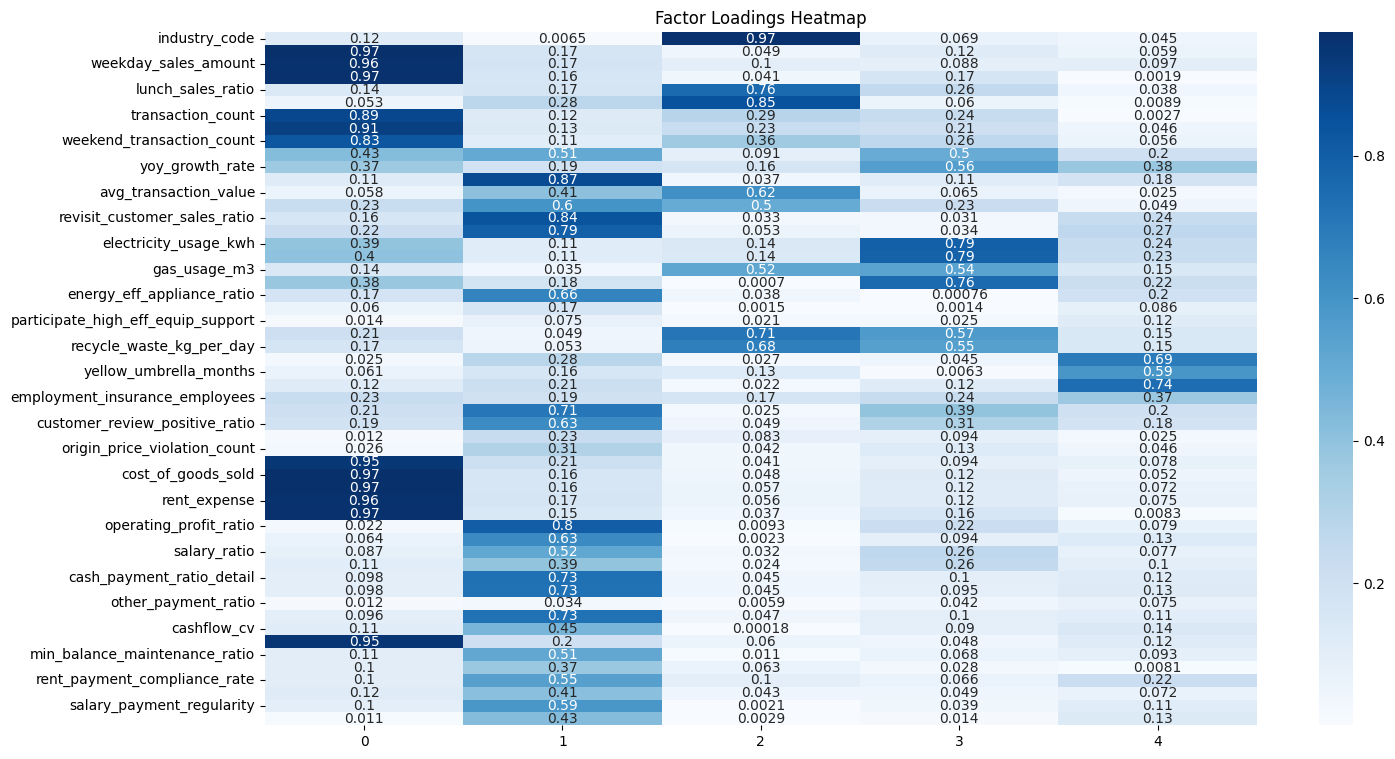

In [30]:

# ==============================
# 5. ÏöîÏù∏ Ï†ÅÏû¨Îüâ ÏãúÍ∞ÅÌôî
# ==============================
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(abs(loadings2), annot=True, cmap="Blues")
plt.title("Factor Loadings Heatmap")
plt.show()

Factor Scores Head:
    Factor1   Factor2   Factor3   Factor4   Factor5
0 -0.455642 -0.602198  0.085505  1.008701 -0.804934
1 -0.065328 -0.236996  0.001322  0.616755 -1.851348
2 -0.028023 -0.703753  0.332385  0.409937 -1.137570
3 -0.324492  0.137399  0.463370  0.048404 -1.639026
4 -0.733795  0.537612 -0.027456  0.718547 -0.964072


/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


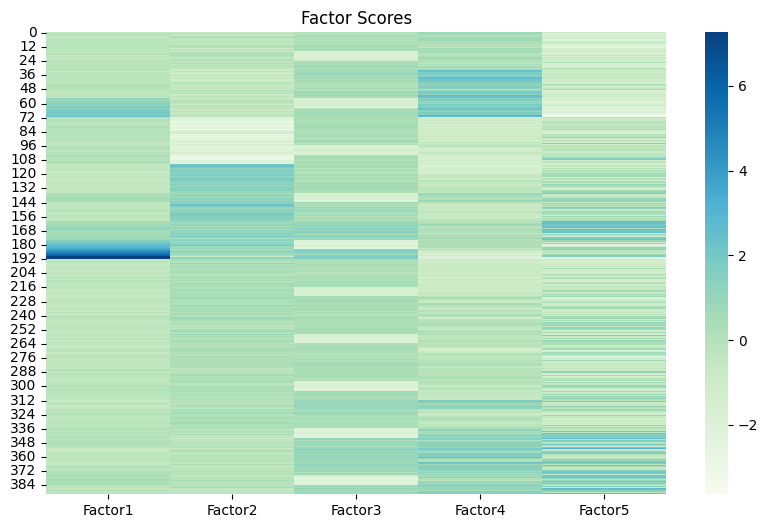

In [31]:

# ==============================
# 6. ÏöîÏù∏ Ï†êÏàò Í≥ÑÏÇ∞ Î∞è ÌôïÏù∏
# ==============================

# ÏöîÏù∏ Ï†êÏàò Í≥ÑÏÇ∞
factor_scores2 = pd.DataFrame(
    fa2.transform(X_validation_filtered),
    columns=[f"Factor{i+1}" for i in range(fa2.n_factors)],
    index=X_validation_filtered.index
)

# [Ï∂îÍ∞Ä] Í≥ÑÏÇ∞Îêú ÏöîÏù∏ Ï†êÏàò ÏàòÏπò Ï∂úÎ†• (ÏÉÅÏúÑ 5Í∞ú Ìñâ)
print("Factor Scores Head:")
print(factor_scores2.head())

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
plt.figure(figsize=(10,6))
sns.heatmap(factor_scores2, cmap="GnBu")
plt.title("Factor Scores")
plt.show()

Explained variance ratio: [3.77480504e-01 1.34743991e-01 7.89571782e-02 5.32545287e-02
 4.03372041e-02 2.74311897e-02 1.93583989e-02 1.89842959e-02
 1.77922802e-02 1.62058846e-02 1.57262629e-02 1.44838721e-02
 1.40455850e-02 1.31526720e-02 1.26689066e-02 1.19425173e-02
 1.14549410e-02 1.10480673e-02 1.06067096e-02 9.88804774e-03
 9.45183785e-03 9.02791497e-03 8.58497092e-03 7.89922684e-03
 7.86285971e-03 7.32462367e-03 6.30746600e-03 5.08499672e-03
 4.43849047e-03 3.33412313e-03 3.17525569e-03 3.03071630e-03
 2.57499563e-03 2.26198759e-03 2.06662476e-03 1.75041935e-03
 1.50771327e-03 1.29764207e-03 8.18155734e-04 6.55763050e-04
 5.91343997e-04 3.79424828e-04 2.92800758e-04 2.20867518e-04
 1.58350412e-04 1.50366641e-04 1.05431926e-04 5.26386038e-05
 2.07099389e-05 3.69073669e-06 1.53770343e-06 1.47184495e-06
 1.35633598e-06 1.18779778e-06]
Components (Loadings):
     industry_code  total_sales_amount  weekday_sales_amount  \
0        0.032718            0.253713              0.249696   

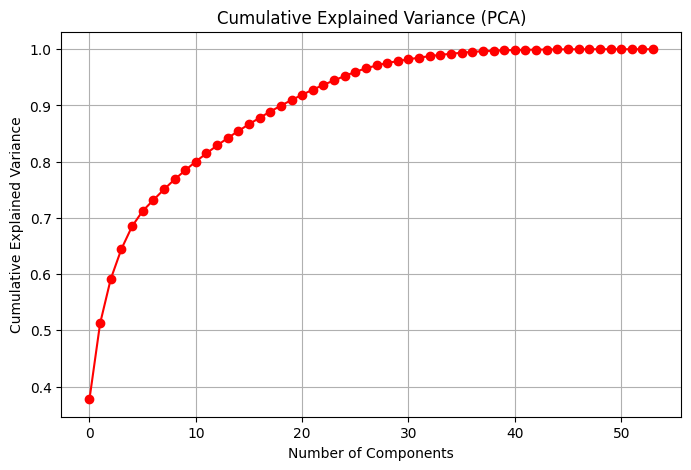

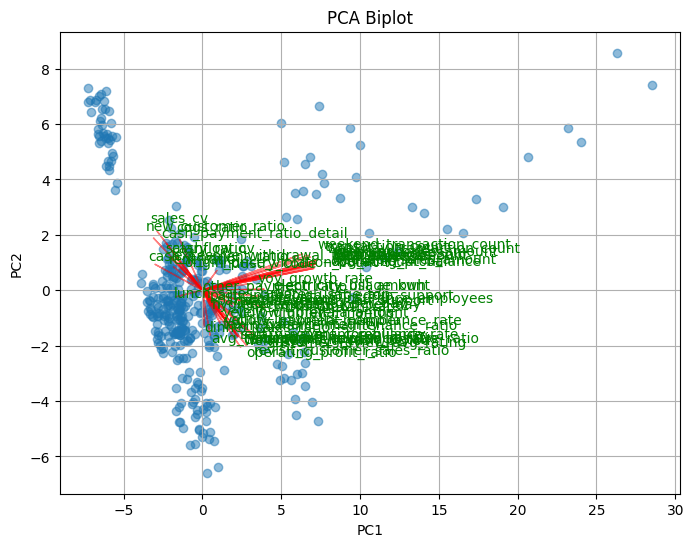

In [32]:
# ==============================
# 7. PCA ÏàòÌñâ (ÏàòÏ†ïÎêú ÏΩîÎìú)
# ==============================
from sklearn.decomposition import PCA

# [ÏàòÏ†ï] PCAÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú X_validation_filteredÎ°ú Î≥ÄÍ≤Ω
# pca_X = standardized_X.copy() # ÏõêÎ≥∏ ÏΩîÎìú
pca_X = X_validation_filtered.copy() # ÏàòÏ†ïÎêú ÏΩîÎìú

# PCA Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
pca = PCA()
pca.fit(pca_X)

# Ï£ºÏÑ±Î∂Ñ Í≤∞Í≥º Ï∂úÎ†•
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Components (Loadings):\n", pd.DataFrame(pca.components_, columns=pca_X.columns))

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Biplot Ìï®Ïàò (Ìï®Ïàò Ï†ïÏùòÎäî ÏàòÏ†ïÌï† ÌïÑÏöî ÏóÜÏùå)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*max(xs), coeff[i,1]*max(ys),
                  color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, "Var"+str(i+1), color='g')
        else:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, labels[i], color='g')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.show()

# Biplot Ìò∏Ï∂ú ÏãúÏóêÎèÑ ÏàòÏ†ïÎêú pca_XÏôÄ Ìï¥Îãπ Ïó¥ Ïù¥Î¶ÑÏùÑ ÏÇ¨Ïö©
biplot(pca.transform(pca_X), pca.components_.T, labels=pca_X.columns)

In [51]:
# ==============================
# ÏöîÏù∏Î∂ÑÏÑù Í∏∞Î∞ò Ïã†Ïö©ÌèâÍ∞Ä Ï†êÏàò ÏÇ∞Ï∂ú ÏãúÏä§ÌÖú (1~1000Ï†ê)
# Ï†ïÌôïÌïú Í≥µÏãù: (Í∞Å Î≥ÄÏàòÏùò ÏµúÎåÄloading √ó Ï†ïÍ∑úÌôîÎêú Î≥ÄÏàòÍ∞í) √ó FactorÏùò Proportion Variance
# ==============================

import pandas as pd
import numpy as np
from IPython.display import display

# 1. FactorÎ≥Ñ Proportion Variance (Ï†úÍ≥µÎ∞õÏùÄ Ï†ïÌôïÌïú Í∞í)
factor_weights = pd.DataFrame({
    'Factor': ['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'],
    'SS_Loadings': [12.0289, 9.7800, 4.5706, 4.3318, 2.4863],
    'Proportion_Variance': [0.2228, 0.1811, 0.0846, 0.0802, 0.0460],
    'Percentage': [22.2758, 18.1110, 8.4641, 8.0219, 4.6043]
})

print("üìä FACTOR WEIGHTS (Ï†úÍ≥µÎ∞õÏùÄ Ï†ïÌôïÌïú Í∞í)")
print("="*60)
display(factor_weights)

# 2. Í∞Å Î≥ÄÏàòÎ≥Ñ ÏµúÎåÄ Loading Í∞íÍ≥º Ìï†ÎãπÎêú Factor
variable_loadings = {
    # Factor_1
    'total_sales_amount': {'factor': 'Factor_1', 'max_loading': 0.973413},
    'cost_of_goods_sold': {'factor': 'Factor_1', 'max_loading': 0.972884},
    'total_salary': {'factor': 'Factor_1', 'max_loading': 0.970351},
    'weekend_sales_amount': {'factor': 'Factor_1', 'max_loading': 0.968909},
    'other_expenses': {'factor': 'Factor_1', 'max_loading': 0.968849},
    'rent_expense': {'factor': 'Factor_1', 'max_loading': 0.963958},
    'weekday_sales_amount': {'factor': 'Factor_1', 'max_loading': 0.962381},
    'avg_account_balance': {'factor': 'Factor_1', 'max_loading': 0.953340},
    'operating_profit': {'factor': 'Factor_1', 'max_loading': 0.945899},
    'weekday_transaction_count': {'factor': 'Factor_1', 'max_loading': 0.914308},
    'transaction_count': {'factor': 'Factor_1', 'max_loading': 0.885985},
    'weekend_transaction_count': {'factor': 'Factor_1', 'max_loading': 0.825291},
    
    # Factor_2
    'sales_cv': {'factor': 'Factor_2', 'max_loading': -0.873813},
    'revisit_customer_sales_ratio': {'factor': 'Factor_2', 'max_loading': 0.838488},
    'operating_profit_ratio': {'factor': 'Factor_2', 'max_loading': 0.802784},
    'new_customer_ratio': {'factor': 'Factor_2', 'max_loading': -0.791030},
    'cash_payment_ratio_detail': {'factor': 'Factor_2', 'max_loading': -0.732282},
    'weighted_avg_cash_period': {'factor': 'Factor_2', 'max_loading': 0.729965},
    'card_payment_ratio_detail': {'factor': 'Factor_2', 'max_loading': 0.729321},
    'customer_review_avg_rating': {'factor': 'Factor_2', 'max_loading': 0.705311},
    'energy_eff_appliance_ratio': {'factor': 'Factor_2', 'max_loading': 0.663132},
    'cogs_ratio': {'factor': 'Factor_2', 'max_loading': -0.632351},
    'customer_review_positive_ratio': {'factor': 'Factor_2', 'max_loading': 0.628077},
    'cash_payment_ratio': {'factor': 'Factor_2', 'max_loading': -0.599696},
    'salary_payment_regularity': {'factor': 'Factor_2', 'max_loading': 0.587445},
    'rent_payment_compliance_rate': {'factor': 'Factor_2', 'max_loading': 0.546654},
    'salary_ratio': {'factor': 'Factor_2', 'max_loading': -0.518603},
    'min_balance_maintenance_ratio': {'factor': 'Factor_2', 'max_loading': 0.514475},
    'mom_growth_rate': {'factor': 'Factor_2', 'max_loading': 0.509071},
    'cashflow_cv': {'factor': 'Factor_2', 'max_loading': -0.454730},
    'tax_payment_integrity': {'factor': 'Factor_2', 'max_loading': 0.425768},
    'utility_payment_compliance_rate': {'factor': 'Factor_2', 'max_loading': 0.413921},
    'rent_ratio': {'factor': 'Factor_2', 'max_loading': -0.394557},
    'excessive_withdrawal_frequency': {'factor': 'Factor_2', 'max_loading': -0.373891},
    'origin_price_violation_count': {'factor': 'Factor_2', 'max_loading': -0.307711},
    
    # Factor_3
    'industry_code': {'factor': 'Factor_3', 'max_loading': -0.966277},
    'dinner_sales_ratio': {'factor': 'Factor_3', 'max_loading': 0.849506},
    'lunch_sales_ratio': {'factor': 'Factor_3', 'max_loading': 0.760153},
    'food_waste_kg_per_day': {'factor': 'Factor_3', 'max_loading': 0.711929},
    'recycle_waste_kg_per_day': {'factor': 'Factor_3', 'max_loading': 0.677638},
    'avg_transaction_value': {'factor': 'Factor_3', 'max_loading': 0.615929},
    
    # Factor_4
    'electricity_usage_kwh': {'factor': 'Factor_4', 'max_loading': 0.791406},
    'electricity_bill_amount': {'factor': 'Factor_4', 'max_loading': 0.785287},
    'water_usage_ton': {'factor': 'Factor_4', 'max_loading': 0.758572},
    'yoy_growth_rate': {'factor': 'Factor_4', 'max_loading': 0.555289},
    'gas_usage_m3': {'factor': 'Factor_4', 'max_loading': 0.538674},
    
    # Factor_5
    'yellow_umbrella_amount': {'factor': 'Factor_5', 'max_loading': 0.743937},
    'yellow_umbrella_member': {'factor': 'Factor_5', 'max_loading': 0.693872},
    'yellow_umbrella_months': {'factor': 'Factor_5', 'max_loading': 0.590661},
    'employment_insurance_employees': {'factor': 'Factor_5', 'max_loading': 0.369857}
}

# 3. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î∞ò Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
def calculate_normalization_stats(dataframe, variable_loadings_dict):
    """Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Í∏∞Î∞òÏúºÎ°ú Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞"""
    stats = {}
    
    for var_name in variable_loadings_dict.keys():
        if var_name in dataframe.columns:
            values = dataframe[var_name].dropna()
            if len(values) > 0:
                stats[var_name] = {
                    'min': values.min(),
                    'max': values.max(),
                    'mean': values.mean(),
                    'std': values.std(),
                    'q25': values.quantile(0.25),
                    'q75': values.quantile(0.75)
                }
            else:
                stats[var_name] = {
                    'min': 0, 'max': 1, 'mean': 0.5, 'std': 0.5, 'q25': 0.25, 'q75': 0.75
                }
    return stats

# Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
print("üìä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î∞ò Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ Ï§ë...")
normalization_stats = calculate_normalization_stats(X_validation_filtered, variable_loadings)
print(f"‚úÖ {len(normalization_stats)}Í∞ú Î≥ÄÏàòÏùò Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ÏôÑÎ£å")

# 4. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î∞ò Ï†ïÍ∑úÌôî Ìï®Ïàò
def normalize_variable_realistic(var_name, var_value, stats_dict):
    """
    Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Í∏∞Î∞òÏúºÎ°ú Ï†ïÍ∑úÌôî
    """
    if pd.isna(var_value) or var_name not in stats_dict:
        return 0.5
    
    stats = stats_dict[var_name]
    
    # ÏùåÏàò loading Î≥ÄÏàòÎì§ (Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)
    negative_better_vars = ['sales_cv', 'new_customer_ratio', 'cash_payment_ratio_detail', 
                           'cash_payment_ratio', 'cogs_ratio', 'salary_ratio', 'rent_ratio',
                           'cashflow_cv', 'excessive_withdrawal_frequency', 'origin_price_violation_count']
    
    try:
        if var_name in negative_better_vars:
            # ÏùåÏàò loading Î≥ÄÏàòÎì§ - Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏúºÎØÄÎ°ú Ïó≠Ï†ïÍ∑úÌôî
            if stats['max'] != stats['min']:
                # Min-Max Ï†ïÍ∑úÌôî ÌõÑ Ïó≠Ï†Ñ (1ÏóêÏÑú ÎπºÍ∏∞)
                normalized = 1 - ((var_value - stats['min']) / (stats['max'] - stats['min']))
            else:
                normalized = 0.5
        
        elif var_name == 'industry_code':
            # ÏóÖÏ¢ÖÏΩîÎìúÎäî Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàòÏù¥ÎØÄÎ°ú Ï§ëÍ∞ÑÍ∞í
            normalized = 0.5
        
        else:
            # ÏùºÎ∞ò Î≥ÄÏàòÎì§ - Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùå
            if stats['max'] != stats['min']:
                # Min-Max Ï†ïÍ∑úÌôî
                normalized = (var_value - stats['min']) / (stats['max'] - stats['min'])
            else:
                normalized = 0.5
        
        # 0~1 Î≤îÏúÑÎ°ú ÌÅ¥Î¶¨Ìïë
        normalized = max(0, min(1, normalized))
        return normalized
    
    except Exception as e:
        return 0.5

# 5. Ïã†Ïö©ÌèâÍ∞Ä Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def calculate_credit_score_exact(data_row, variable_loadings_dict, factor_weights_df, 
                                normalization_stats_dict, score_min=1, score_max=1000):
    """
    Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Î∞òÏòÅÌïú Ïã†Ïö©ÌèâÍ∞Ä Ï†êÏàò Í≥ÑÏÇ∞
    """
    
    factor_contributions = {f'Factor_{i+1}': 0 for i in range(5)}
    variable_details = []
    
    # Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú Í≥ÑÏÇ∞
    for var_name, var_info in variable_loadings_dict.items():
        if var_name in data_row:
            var_value = data_row[var_name]
            max_loading = var_info['max_loading']
            assigned_factor = var_info['factor']
            
            # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†ïÍ∑úÌôî
            normalized_value = normalize_variable_realistic(var_name, var_value, normalization_stats_dict)
            
            # LoadingÍ≥º Ï†ïÍ∑úÌôîÎêú Í∞íÏùò Í≥±
            contribution = abs(max_loading) * normalized_value
            
            # Ìï¥Îãπ FactorÏóê Í∏∞Ïó¨ÎèÑ ÎàÑÏ†Å
            factor_contributions[assigned_factor] += contribution
            
            variable_details.append({
                'variable': var_name,
                'original_value': var_value,
                'normalized_value': normalized_value,
                'max_loading': max_loading,
                'assigned_factor': assigned_factor,
                'contribution': contribution
            })
    
    # FactorÎ≥Ñ Proportion Variance Ï†ÅÏö©
    total_weighted_score = 0
    factor_scores = {}
    
    for factor_name in factor_contributions.keys():
        factor_sum = factor_contributions[factor_name]
        
        # Ìï¥Îãπ FactorÏùò Proportion Variance Í∞ÄÏ†∏Ïò§Í∏∞
        factor_weight = factor_weights_df[factor_weights_df['Factor'] == factor_name]['Proportion_Variance'].iloc[0]
        
        # Factor Ï†êÏàò = Factor ÎÇ¥ Î≥ÄÏàòÎì§Ïùò Í∏∞Ïó¨ÎèÑ Ìï© √ó Proportion Variance
        factor_score = factor_sum * factor_weight
        factor_scores[factor_name] = factor_score
        
        total_weighted_score += factor_score
    
    # Ï†êÏàò Ïä§ÏºÄÏùºÎßÅ Í∞úÏÑ†
    # Ï†ÑÏ≤¥ Í∞ÄÏ§ëÏπò Ìï©ÏùÑ Í≥†Î†§ÌïòÏó¨ ÌòÑÏã§Ï†ÅÏù∏ Ï†êÏàò Î≤îÏúÑ ÏÉùÏÑ±
    total_possible_weight = sum(factor_weights_df['Proportion_Variance'])
    
    if total_weighted_score > 0:
        # Ï†ïÍ∑úÌôîÎêú Ï†êÏàò Í≥ÑÏÇ∞
        normalized_score = total_weighted_score / (total_possible_weight * 0.1)  # 80% Ïä§ÏºÄÏùºÎßÅ
        # 1~1000Ï†ê Î≤îÏúÑÎ°ú Î≥ÄÌôò
        final_score = score_min + (normalized_score * (score_max - score_min))
    else:
        final_score = score_min
    
    # Ï†êÏàò Î≤îÏúÑ Ï†úÌïú
    final_score = max(score_min, min(score_max, final_score))
    
    return {
        'final_score': final_score,
        'total_weighted_score': total_weighted_score,
        'factor_scores': factor_scores,
        'factor_contributions': factor_contributions,
        'variable_details': variable_details
    }

# 6. Ïã†Ïö©Îì±Í∏â Î∂ÑÎ•ò Ìï®Ïàò
def get_credit_grade(score):
    """Ïã†Ïö©Ï†êÏàòÎ•º Îì±Í∏âÏúºÎ°ú Î≥ÄÌôò"""
    if score >= 900:
        return 'AAA'
    elif score >= 800:
        return 'AA'
    elif score >= 700:
        return 'A'
    elif score >= 600:
        return 'BBB'
    elif score >= 500:
        return 'BB'
    elif score >= 400:
        return 'B'
    elif score >= 300:
        return 'CCC'
    elif score >= 200:
        return 'CC'
    else:
        return 'C'

# 7. Î∞∞Ïπò Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_batch_scores_exact(dataframe, variable_loadings_dict, factor_weights_df, normalization_stats_dict):
    """Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïã†Ïö©Ï†êÏàò Î∞∞Ïπò Í≥ÑÏÇ∞"""
    
    results = []
    
    print(f"üìä {len(dataframe)}Í∞ú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïã†Ïö©Ï†êÏàò Í≥ÑÏÇ∞ Ï§ë...")
    
    for idx, row in dataframe.iterrows():
        try:
            score_result = calculate_credit_score_exact(row, variable_loadings_dict, factor_weights_df, normalization_stats_dict)
            
            result = {
                'index': idx,
                'credit_score': round(score_result['final_score'], 2),
                'credit_grade': get_credit_grade(score_result['final_score']),
                'total_weighted_score': round(score_result['total_weighted_score'], 6)
            }
            
            # FactorÎ≥Ñ Ï†êÏàò Ï∂îÍ∞Ä
            for factor, score in score_result['factor_scores'].items():
                result[f'{factor}_score'] = round(score, 6)
            
            # FactorÎ≥Ñ Í∏∞Ïó¨ÎèÑ Ï∂îÍ∞Ä
            for factor, contrib in score_result['factor_contributions'].items():
                result[f'{factor}_contribution'] = round(contrib, 6)
            
            results.append(result)
            
            if (idx + 1) % 100 == 0:
                print(f"  ÏßÑÌñâÎ•†: {idx + 1}/{len(dataframe)}")
            
        except Exception as e:
            print(f"Error calculating score for index {idx}: {e}")
            results.append({
                'index': idx,
                'credit_score': 1,
                'credit_grade': 'ERROR',
                'total_weighted_score': 0
            })
    
    return pd.DataFrame(results)

# 8. Ïã§Ìñâ Î∞è ÌÖåÏä§Ìä∏
print("\n" + "="*80)
print("üéØ IMPROVED CREDIT SCORING SYSTEM READY")
print("="*80)

# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î°ú ÌÖåÏä§Ìä∏ (Ï≤´ 10Í∞ú)
if len(X_validation_filtered) > 0:
    print("\nüìä SAMPLE CALCULATIONS (Ï≤´ 10Í∞ú Îç∞Ïù¥ÌÑ∞):")
    print("-" * 80)
    
    sample_scores = []
    for i in range(min(10, len(X_validation_filtered))):
        sample_data = X_validation_filtered.iloc[i]
        score_result = calculate_credit_score_exact(sample_data, variable_loadings, factor_weights, normalization_stats)
        
        sample_scores.append(score_result['final_score'])
        
        print(f"Îç∞Ïù¥ÌÑ∞ {i+1}: {score_result['final_score']:.2f}Ï†ê ({get_credit_grade(score_result['final_score'])})")
        
        if i == 4:  # Ï≤´ 5Í∞úÎßå ÏÉÅÏÑ∏ Ï∂úÎ†•
            print(f"  üìà Ï¥ù Í∞ÄÏ§ëÏ†êÏàò: {score_result['total_weighted_score']:.6f}")
            # Ï£ºÏöî Factor Í∏∞Ïó¨ÎèÑ
            factor_contribs = score_result['factor_contributions']
            sorted_factors = sorted(factor_contribs.items(), key=lambda x: x[1], reverse=True)[:2]
            for factor, contrib in sorted_factors:
                weight = factor_weights[factor_weights['Factor'] == factor]['Proportion_Variance'].iloc[0]
                final_score = score_result['factor_scores'][factor]
                print(f"  üìã {factor}: {contrib:.4f} √ó {weight:.4f} = {final_score:.6f}")
    
    print(f"\nüìä ÏÉòÌîå Ï†êÏàò Î∂ÑÌè¨:")
    print(f"  ÏµúÏÜåÍ∞í: {min(sample_scores):.2f}Ï†ê")
    print(f"  ÏµúÎåÄÍ∞í: {max(sample_scores):.2f}Ï†ê") 
    print(f"  ÌèâÍ∑†Í∞í: {np.mean(sample_scores):.2f}Ï†ê")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {np.std(sample_scores):.2f}Ï†ê")
    
    # Ï†êÏàòÍ∞Ä Î™®Îëê Í∞ôÏùÄÏßÄ ÌôïÏù∏
    if len(set(sample_scores)) == 1:
        print("  ‚ö†Ô∏è  WARNING: Î™®Îì† Ï†êÏàòÍ∞Ä ÎèôÏùºÌï©ÎãàÎã§! Ï†ïÍ∑úÌôî ÎòêÎäî Ïä§ÏºÄÏùºÎßÅ Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§.")
    else:
        print(f"  ‚úÖ {len(set(sample_scores))}Í∞úÏùò ÏÑúÎ°ú Îã§Î•∏ Ï†êÏàòÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
    
    # Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ ÏÉòÌîå Ï∂úÎ†•
    print(f"\nüìä Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ ÏÉòÌîå (Ï≤´ 5Í∞ú Î≥ÄÏàò):")
    print("-" * 50)
    for i, (var_name, stats) in enumerate(list(normalization_stats.items())[:5]):
        print(f"{var_name}: min={stats['min']:.3f}, max={stats['max']:.3f}, mean={stats['mean']:.3f}")

print(f"\n" + "="*80)
print("üí° ÏÇ¨Ïö©Î≤ï:")
print("="*80)
print("# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï†êÏàò Í≥ÑÏÇ∞:")
print("scores_df = calculate_batch_scores_exact(X_validation_filtered, variable_loadings, factor_weights, normalization_stats)")
print("display(scores_df.head())")
print("")
print("# Ï†êÏàò Î∂ÑÌè¨ ÌôïÏù∏:")
print("print('Ï†êÏàò Î∂ÑÌè¨:', scores_df['credit_score'].describe())")
print("print('Îì±Í∏â Î∂ÑÌè¨:', scores_df['credit_grade'].value_counts())")
print("")
print("# CSVÎ°ú Ï†ÄÏû•:")
print("scores_df.to_csv('realistic_credit_scores.csv', encoding='utf-8-sig', index=False)")

print(f"\n" + "="*80)
print("‚úÖ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î∞ò Ïã†Ïö©ÌèâÍ∞Ä ÏãúÏä§ÌÖú Íµ¨Ï∂ï ÏôÑÎ£å!")
print("üîß Í∞úÏÑ†ÏÇ¨Ìï≠: Min-Max Ï†ïÍ∑úÌôî + ÌòÑÏã§Ï†ÅÏù∏ Ï†êÏàò Ïä§ÏºÄÏùºÎßÅ")
print("="*80)

üìä FACTOR WEIGHTS (Ï†úÍ≥µÎ∞õÏùÄ Ï†ïÌôïÌïú Í∞í)


Factor  SS_Loadings  Proportion_Variance  Percentage
0  Factor_1      12.0289               0.2228     22.2758
1  Factor_2       9.7800               0.1811     18.1110
2  Factor_3       4.5706               0.0846      8.4641
3  Factor_4       4.3318               0.0802      8.0219
4  Factor_5       2.4863               0.0460      4.6043

üìä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î∞ò Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ Ï§ë...
‚úÖ 50Í∞ú Î≥ÄÏàòÏùò Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ÏôÑÎ£å

üéØ IMPROVED CREDIT SCORING SYSTEM READY

üìä SAMPLE CALCULATIONS (Ï≤´ 10Í∞ú Îç∞Ïù¥ÌÑ∞):
--------------------------------------------------------------------------------
Îç∞Ïù¥ÌÑ∞ 1: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 2: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 3: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 4: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 5: 1000.00Ï†ê (AAA)
  üìà Ï¥ù Í∞ÄÏ§ëÏ†êÏàò: 1.944781
  üìã Factor_2: 8.6297 √ó 0.1811 = 1.562833
  üìã Factor_3: 2.1459 √ó 0.0846 = 0.181543
Îç∞Ïù¥ÌÑ∞ 6: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 7: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 8: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 9: 1000.00Ï†ê (AAA)
Îç∞Ïù¥ÌÑ∞ 10: 1000.00Ï†ê (AAA)

üìä ÏÉòÌîå Ï†êÏàò Î∂ÑÌè¨:
  ÏµúÏÜåÍ∞í: 1000.00Ï†ê
  ÏµúÎåÄÍ∞í: 1000.00Ï†ê
  ÌèâÍ∑†Í∞í: 1000.00Ï†ê
  ÌëúÏ§ÄÌé∏Ï∞®: 0.00Ï†ê
  ‚ö†Ô∏è  WARNING: Î™®Îì† Ï†êÏàòÍ∞Ä ÎèôÏùºÌï©ÎãàÎã§! Ï†ïÍ∑úÌôî ÎòêÎäî Ïä§ÏºÄÏùºÎßÅ Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§.

üìä Ï†ïÍ∑úÌôî ÌÜµÍ≥Ñ ÏÉòÌîå (Ï≤´ 5Í∞ú Î≥ÄÏàò):
----